# 2. Linear and Polynomial Regression

##### Krishna Penukonda
##### 1001781

## Instructions

1. Ensure that the `data` folder is in the same directory as this notebook and contains `2/hw1x.dat` and `2/hw1y.dat`
2. Run all cells

In [1]:
!pip install numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Load Data

In [3]:
FEATURES_FILE = 'data/2/hw1x.dat'
LABELS_FILE = 'data/2/hw1y.dat'

In [4]:
features = pd.read_csv(FEATURES_FILE, names=['x'])
labels = pd.read_csv(LABELS_FILE, names=['y'])
data = features.join(labels)
data.head()

,x,y
0,0.01,3.557667
1,0.02,4.873885
2,0.03,0.801153
3,0.04,3.942173
4,0.05,3.418765


#### Helper Functions

In [5]:
def plot_polynomial(xmin, xmax, coeffs, num=100):
    plot_x = np.linspace(x.min(), x.max(), num=num)
    plot_y = np.polynomial.polynomial.polyval(plot_x, coeffs, tensor=False)
    return sns.lineplot(plot_x, plot_y)

def training_error(x, coeffs, y_true):
    y_pred = np.polynomial.polynomial.polyval(x, coeffs)
    errors = ((y_true - y_pred) ** 2) / 2
    return np.sum(errors)

## Visualize Data

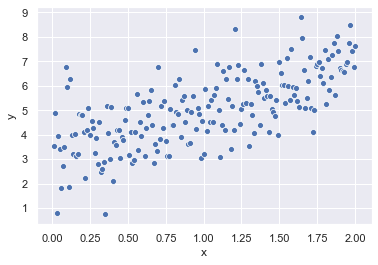

In [6]:
sns.scatterplot('x', 'y', data=data)
plt.show()

## Closed-Form Linear Regression

In [7]:
def linear_regress_closed(features, labels):
    x = np.power(features, [0, 1])
    W = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(labels)
    return W

In [8]:
# Compute weights
x, y = features.to_numpy(), labels.to_numpy()
weights = linear_regress_closed(x, y)
print(f"Closed-form Linear Regression Coefficients:\n{weights}")

Closed-form Linear Regression Coefficients:
[[3.2447227 ]
 [1.78157138]]


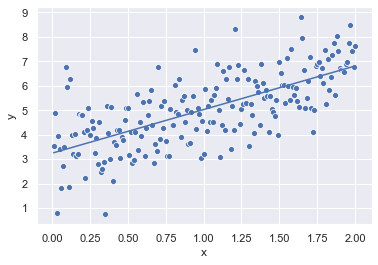

In [9]:
# Plot Regression Line
sns.scatterplot('x', 'y', data=data)
plot_polynomial(x.min(), x.max(), weights)
plt.show()

In [10]:
# Calculate Training Error
error = training_error(x, weights, y)
print(f"Empirical Risk = {error:.5f}")

Empirical Risk = 116.25212


## Gradient Descent-based Linear Regression

In [11]:
def linear_regress_gd(features, labels, lr=0.01, iterations=5, stochastic=False):
    if stochastic:
        indices = np.random.permutation(len(features))
        features = features[indices]
        labels = labels[indices]
    features = np.power(features, [0, 1])
    W = np.zeros((2,))
    samples = len(features)
    for i, (x, y_true) in enumerate(zip(features, labels)):
        if iterations and i == iterations:
            break
        y_pred = np.dot(x, W)
        error = y_true - y_pred
        gradient = -(2 / samples) * error * x
        W -= gradient
        print(
            f"Iteration {i + 1} | "
            f"Parameters: {W} | "
            f"Training error: {training_error(features, W, labels):.2f}"
        )
    return W

Iteration 1 | Parameters: [0.03557667 0.00035577] | Training error: 5442.59
Iteration 2 | Parameters: [0.08395968 0.00132343] | Training error: 5344.27
Iteration 3 | Parameters: [0.09113122 0.00153857] | Training error: 5329.63
Iteration 4 | Parameters: [0.12964103 0.00307897] | Training error: 5250.58
Iteration 5 | Parameters: [0.16253073 0.00472345] | Training error: 5182.90
Iteration 6 | Parameters: [0.1790257  0.00571315] | Training error: 5148.79
Iteration 7 | Parameters: [0.20429553 0.00748204] | Training error: 5096.26
Iteration 8 | Parameters: [0.23727283 0.01012022] | Training error: 5027.47
Iteration 9 | Parameters: [0.30247496 0.01598841] | Training error: 4891.66
Iteration 10 | Parameters: [0.3591286  0.02165378] | Training error: 4774.17
Iteration 11 | Parameters: [0.37421462 0.02331324] | Training error: 4742.84
Iteration 12 | Parameters: [0.43319373 0.03039073] | Training error: 4620.32
Iteration 13 | Parameters: [0.46867633 0.03500347] | Training error: 4546.76
Iteratio

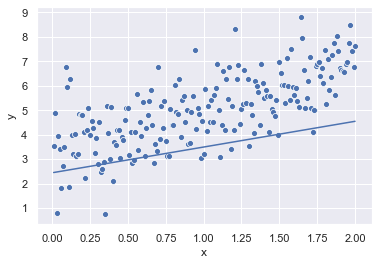

In [21]:
weights = linear_regress_gd(x, y, lr=0.01, iterations=100)
print(f"Weights: {weights}")
sns.scatterplot('x', 'y', data=data)
plot_polynomial(x.min(), x.max(), weights)
plt.show()

Iteration 1 | Parameters: [0.05010903 0.08668862] | Training error: 5232.50
Iteration 2 | Parameters: [0.09984904 0.13443903] | Training error: 5037.84
Iteration 3 | Parameters: [0.12859677 0.14737551] | Training error: 4956.67
Iteration 4 | Parameters: [0.18203354 0.20455285] | Training error: 4742.17
Iteration 5 | Parameters: [0.20981439 0.2259441 ] | Training error: 4648.90
Iteration 6 | Parameters: [0.2588657  0.30835031] | Training error: 4401.85
Iteration 7 | Parameters: [0.29584721 0.3275807 ] | Training error: 4300.07
Iteration 8 | Parameters: [0.34578967 0.37103064] | Training error: 4132.70
Iteration 9 | Parameters: [0.39598468 0.45084069] | Training error: 3903.94
Iteration 10 | Parameters: [0.43573787 0.46992222] | Training error: 3804.33
Iteration 11 | Parameters: [0.47987782 0.50170299] | Training error: 3677.24
Iteration 12 | Parameters: [0.52123289 0.55381038] | Training error: 3522.93
Iteration 13 | Parameters: [0.5773557  0.63799459] | Training error: 3297.71
Iteratio

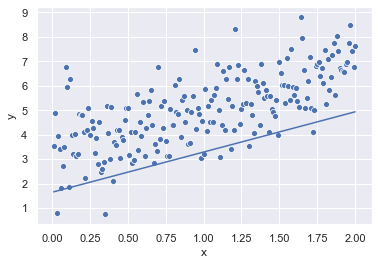

In [13]:
weights = linear_regress_gd(x, y, lr=0.01, iterations=50, stochastic=True)
print(f"Weights: {weights}")
sns.scatterplot('x', 'y', data=data)
plot_polynomial(x.min(), x.max(), weights)
plt.show()

## Polynomial Regression

In [14]:
def PolyRegress(features, labels, d):
    x = np.power(features, range(d + 1))
    W = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(labels)
    return W

#### Quadratic Fit

In [15]:
# Quadratic Fit
weights = PolyRegress(x, y, 2)
print(f"Weights: {weights}")

Weights: [[3.58076915]
 [0.78341361]
 [0.49659591]]


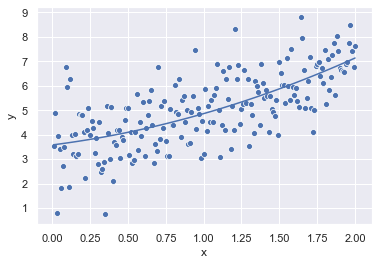

In [16]:
# Plot Quadratic Fit
sns.scatterplot('x', 'y', data=data)
plot_polynomial(x.min(), x.max(), weights)
plt.show()

In [17]:
# Empirical Risk for d=2
error = training_error(x, weights, y)
print(f"Empirical Risk: {error:.3f}")

Empirical Risk: 114.060


^ Training error is lower for a quadratic fit than for the linear case.

#### 3rd to 10th Order Fits

In [18]:
degrees = list(range(3, 11))
errors = [training_error(x, PolyRegress(x, y, d), y) for d  in degrees]
for d, e in zip(degrees, errors):
    print(f"Degree: {d} | Error: {e:.3f}")

Degree: 3 | Error: 114.017
Degree: 4 | Error: 112.923
Degree: 5 | Error: 112.779
Degree: 6 | Error: 112.269
Degree: 7 | Error: 111.247
Degree: 8 | Error: 110.756
Degree: 9 | Error: 110.585
Degree: 10 | Error: 110.633


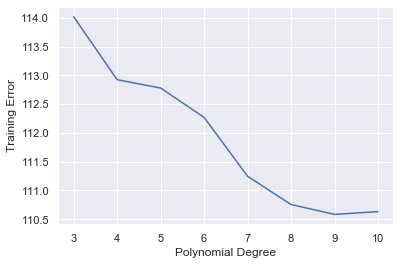

In [19]:
sns.lineplot(degrees, errors)
plt.xlabel("Polynomial Degree")
plt.ylabel("Training Error")
plt.show()

The training error increases from the 10th order polynomial fit onwards